In [12]:
tracks={}
for no in ['A','B','C','D']:
    tracks[no] = pd.read_csv("dataset/track_" + no + ".csv",
                             usecols=['date', 'キロ程', '高低左'],
                             parse_dates=["date"])

In [2]:
summarys = {}
summarys_lgbm = {}
for no in ['A', 'B', 'C', 'D']:
    summarys[no] = pd.read_csv(f'summary12_refine_{no}.csv', index_col=0)
    summarys_lgbm[no] = pd.read_csv(f'summary12_refine_{no}_lgbm.csv', index_col=0)

In [15]:
submision = pd.read_csv(f'submit19_inter.csv', index_col=0, header=None)

/Users/a0082273/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
submision2 = pd.read_csv(f'submit19_inter2.csv', index_col=0, header=None)

In [18]:
submision[submision[1] != submision2[1]]
submision2[submision[1] != submision2[1]]

,1
0,
312,0.99
313,1.08
1366,-1.25
1367,-1.03
1368,-0.53
1370,0.00
1371,0.00
1372,0.00
1373,0.00


,1
0,
312,0.96
313,1.06
1366,-1.23
1367,-1.04
1368,-0.68
1370,0.02
1371,0.02
1372,0.02
1373,0.02


In [16]:
len(submision[submision[1] == submision2[1]])
len(submision)

10826821

10993892

In [19]:
import math

In [21]:
sum([math.isnan(i) for i in submision2])

0

In [16]:
import datetime

In [14]:
def get_day(dates):
    day = [(date - datetime.datetime(2017, 4, 1)).days for date in dates]
    return np.array(day)

In [32]:
summary = summarys["A"]
summary = summary[summary['分散比'] != 100]
summary = summary.sort_values('分散比', ascending=False)
kilos = summary['キロ程'][:20].values

In [33]:
summary.iloc[:20]

,路線,キロ程,傾き,切片,分散比,測定回数,データ数
18481,A,28481,-0.020766,3.805,0.006332,37,10
14644,A,24644,-0.072444,1.510,0.005804,32,10
14661,A,24661,-0.063305,2.610,0.004991,34,12
14665,A,24665,-0.053420,3.680,0.004572,41,10
18484,A,28484,0.041007,4.080,0.003997,37,11
14667,A,24667,-0.052281,1.945,0.003864,45,12
14662,A,24662,-0.050451,3.560,0.003714,37,13
20792,A,30792,-0.048485,3.420,0.003698,241,56
9444,A,19444,0.047893,-1.570,0.003226,54,15
12889,A,22889,-0.045774,6.660,0.003213,120,31


Text(0.5, 1.0, 'kilo: 28481, slope: -0.003067549897071972')

Text(0.5, 1.0, 'kilo: 24644, slope: -0.0022223029540259604')

Text(0.5, 1.0, 'kilo: 24661, slope: -0.003625604544351049')

Text(0.5, 1.0, 'kilo: 24665, slope: 0.00019917936849621904')

Text(0.5, 1.0, 'kilo: 28484, slope: 0.0029852014125230373')

Text(0.5, 1.0, 'kilo: 24667, slope: 0.0005864687574795693')

Text(0.5, 1.0, 'kilo: 24662, slope: -0.0002149485482683847')

Text(0.5, 1.0, 'kilo: 30792, slope: 0.00376496824948534')

Text(0.5, 1.0, 'kilo: 19444, slope: 0.0011476215926971953')

Text(0.5, 1.0, 'kilo: 22889, slope: -0.0010191147442887383')

Text(0.5, 1.0, 'kilo: 28563, slope: -0.003735761441834639')

Text(0.5, 1.0, 'kilo: 14047, slope: -0.005003979058234702')

Text(0.5, 1.0, 'kilo: 19443, slope: -0.004227611300137128')

Text(0.5, 1.0, 'kilo: 26069, slope: -0.0026150121361137387')

Text(0.5, 1.0, 'kilo: 16495, slope: -0.0017322312684321865')

Text(0.5, 1.0, 'kilo: 14041, slope: 0.00037391660328607655')

Text(0.5, 1.0, 'kilo: 24642, slope: 0.0027697691030630803')

Text(0.5, 1.0, 'kilo: 26070, slope: 0.003944808882704762')

Text(0.5, 1.0, 'kilo: 19445, slope: 0.0026788483198790947')

Text(0.5, 1.0, 'kilo: 32692, slope: 0.001644575304180108')

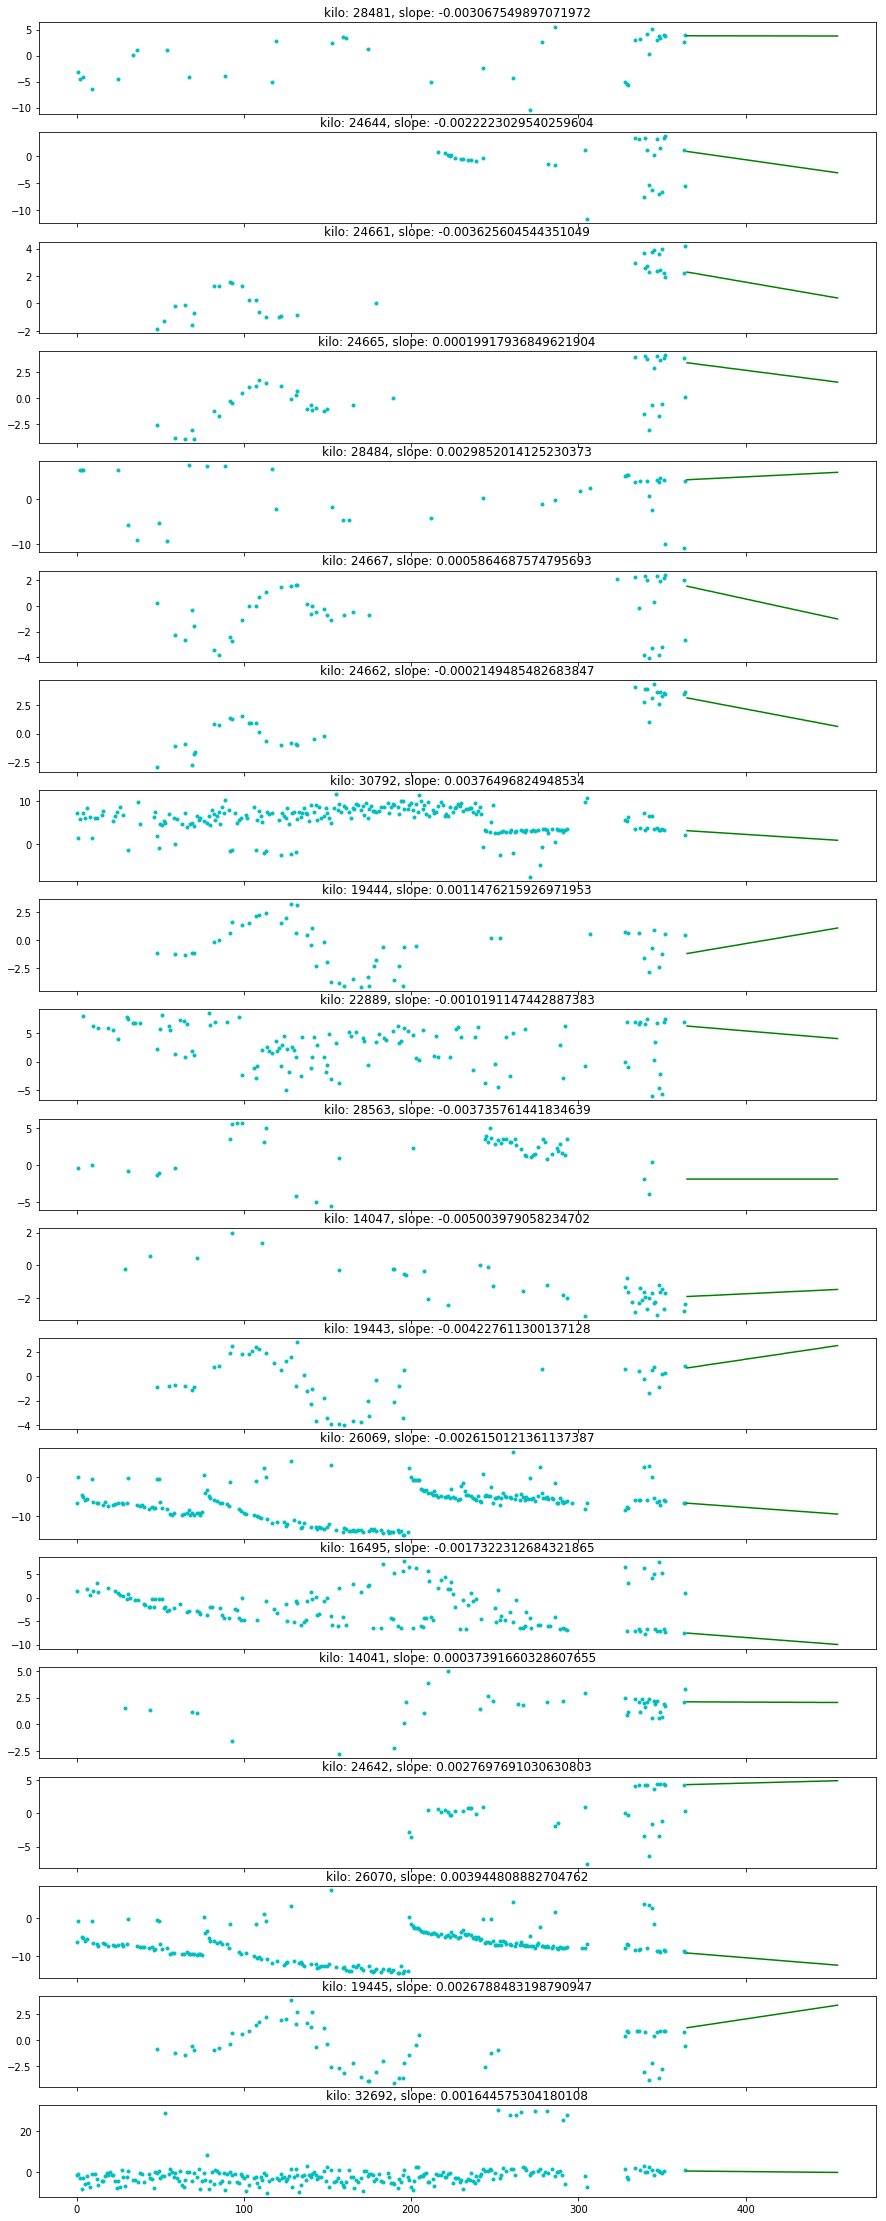

In [37]:
fig, axes = plt.subplots(20, 1, figsize=(15, 40), sharex=True)

track = tracks['A']
n_kilo = len(track['キロ程'].unique())
for i, kilo in enumerate(kilos):
    data = track.loc[track['キロ程'] == kilo, ['date', '高低左']]
    data = data.dropna(subset=['高低左'])
    data = data.reset_index(drop=True)
    data['day'] = get_day(data['date'])
    data = data.drop(['date'], axis=1)
    axes[i].plot(data['day'], data['高低左'], marker='.', linewidth=0, c='c')

    kilo_id = kilo - 10000
    hoge = [kilo_id + i*n_kilo for i in range(91)]
    piyo = submision.loc[hoge, 1]
    axes[i].plot(range(365, 365 + 91), piyo, c='g')

#     normal_id = remove_outliers(data)
#     data = data.loc[normal_id]
#     axes[i].plot(data['day'], data['高低左'], marker='.', linewidth=0, c='b')

#     axes[i].set_title(f'kilo: {kilo},  kilo_id: {kilo_id}')
    slope = summary.loc[i, '傾き']
    axes[i].set_title(f'kilo: {kilo}, slope: {slope}')

In [47]:
summary = summarys["A"]
# summary = summary[summary['データ数'] != 0]
summary = summary[summary['傾き'] != 100]
summary = summary.sort_values('データ数')
kilos = summary['キロ程'][:20].values

In [48]:
summary.iloc[:20]

,路線,キロ程,傾き,切片,分散比,測定回数,データ数
18643,A,28643,0.020813,2.705,0.000561,39,10
18029,A,28029,-0.018516,-1.530,0.000480,41,10
9620,A,19620,-0.015691,-2.080,0.000525,45,10
4037,A,14037,0.004084,-1.510,0.000026,42,10
15886,A,25886,-0.001947,-3.005,0.000014,24,10
10166,A,20166,0.004499,-0.550,0.000125,28,10
10167,A,20167,0.000969,-0.320,0.000007,30,10
20503,A,30503,-0.002069,-4.400,0.000023,29,10
12399,A,22399,0.005983,-0.660,0.000090,44,10
20505,A,30505,0.005176,-7.690,0.000054,31,10


Text(0.5, 1.0, 'kilo: 28643, slope: -0.003067549897071972')

Text(0.5, 1.0, 'kilo: 28029, slope: -0.0022223029540259604')

Text(0.5, 1.0, 'kilo: 19620, slope: -0.003625604544351049')

Text(0.5, 1.0, 'kilo: 14037, slope: 0.00019917936849621904')

Text(0.5, 1.0, 'kilo: 25886, slope: 0.0029852014125230373')

Text(0.5, 1.0, 'kilo: 20166, slope: 0.0005864687574795693')

Text(0.5, 1.0, 'kilo: 20167, slope: -0.0002149485482683847')

Text(0.5, 1.0, 'kilo: 30503, slope: 0.00376496824948534')

Text(0.5, 1.0, 'kilo: 22399, slope: 0.0011476215926971953')

Text(0.5, 1.0, 'kilo: 30505, slope: -0.0010191147442887383')

Text(0.5, 1.0, 'kilo: 20174, slope: -0.003735761441834639')

Text(0.5, 1.0, 'kilo: 22461, slope: -0.005003979058234702')

Text(0.5, 1.0, 'kilo: 28631, slope: -0.004227611300137128')

Text(0.5, 1.0, 'kilo: 28230, slope: -0.0026150121361137387')

Text(0.5, 1.0, 'kilo: 28231, slope: -0.0017322312684321865')

Text(0.5, 1.0, 'kilo: 28028, slope: 0.00037391660328607655')

Text(0.5, 1.0, 'kilo: 28633, slope: 0.0027697691030630803')

Text(0.5, 1.0, 'kilo: 16481, slope: 0.003944808882704762')

Text(0.5, 1.0, 'kilo: 16535, slope: 0.0026788483198790947')

Text(0.5, 1.0, 'kilo: 28653, slope: 0.001644575304180108')

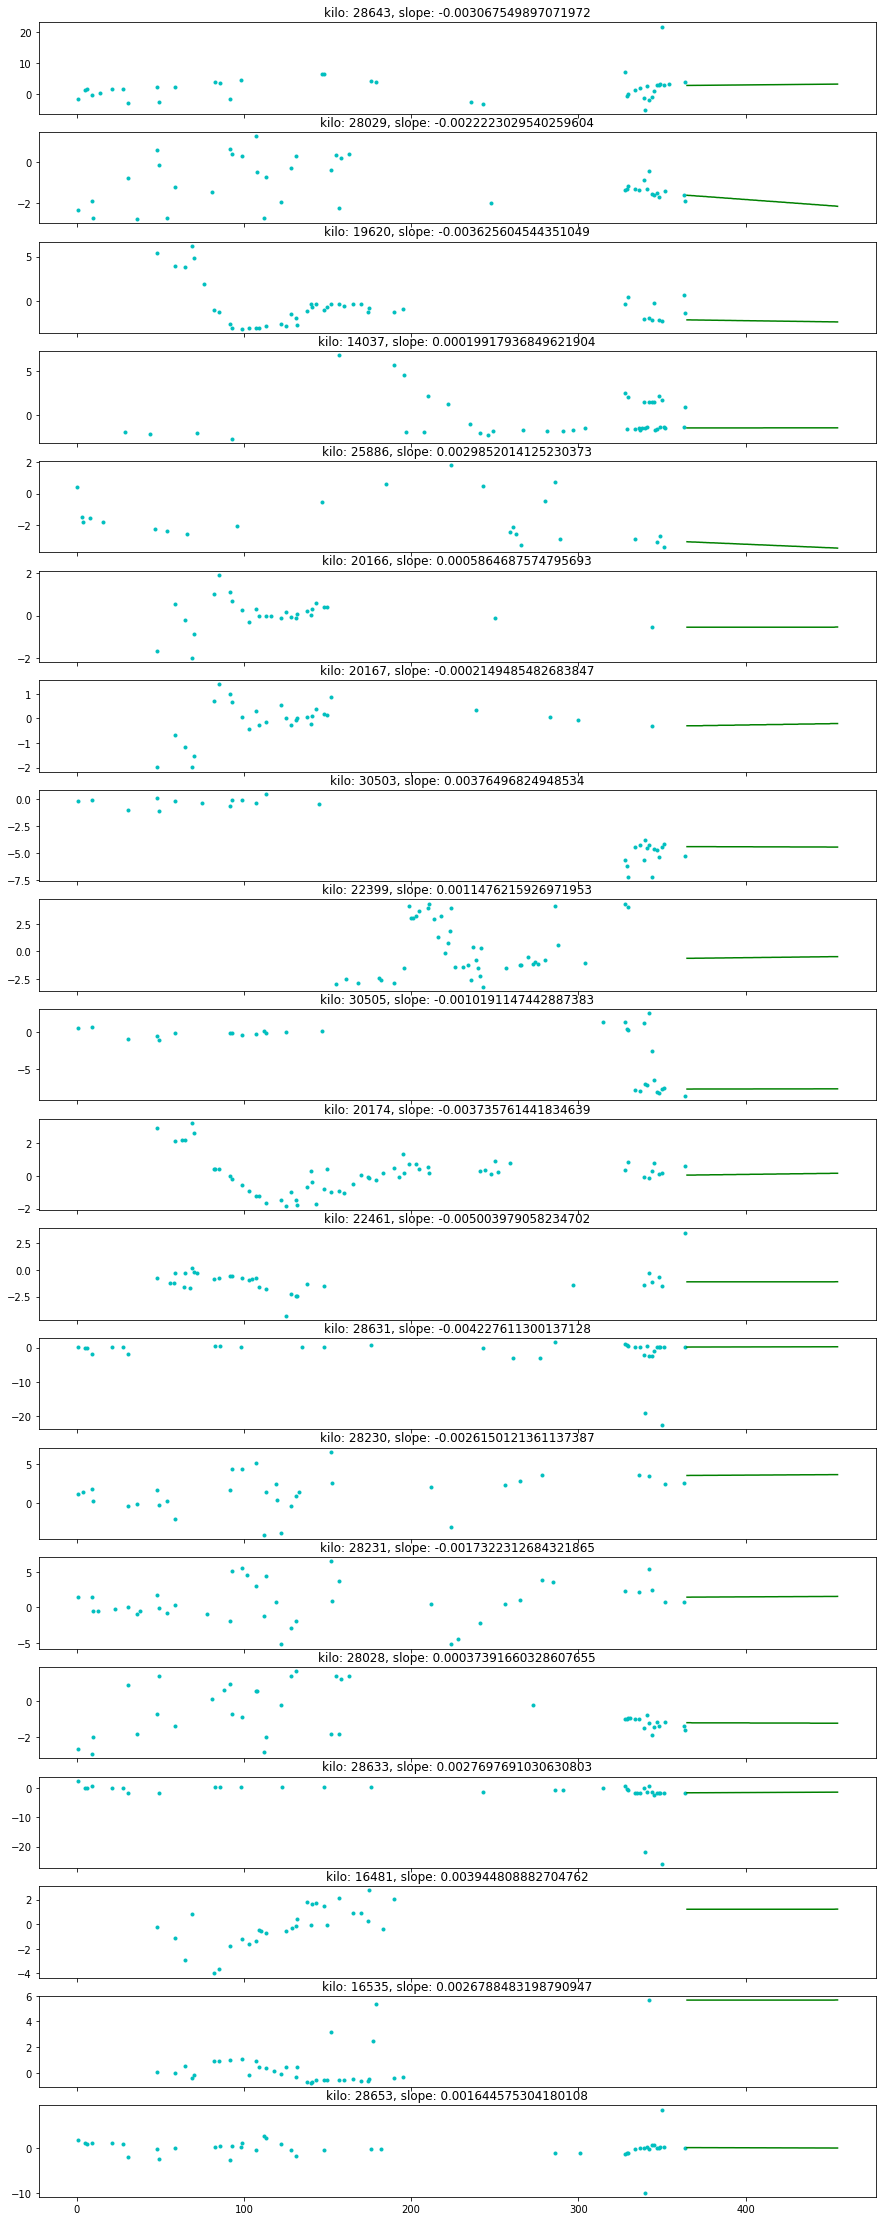

In [49]:
fig, axes = plt.subplots(20, 1, figsize=(15, 40), sharex=True)

track = tracks['A']
n_kilo = len(track['キロ程'].unique())
for i, kilo in enumerate(kilos):
    data = track.loc[track['キロ程'] == kilo, ['date', '高低左']]
    data = data.dropna(subset=['高低左'])
    data = data.reset_index(drop=True)
    data['day'] = get_day(data['date'])
    data = data.drop(['date'], axis=1)
    axes[i].plot(data['day'], data['高低左'], marker='.', linewidth=0, c='c')

    kilo_id = kilo - 10000
    hoge = [kilo_id + i*n_kilo for i in range(91)]
    piyo = submision.loc[hoge, 1]
    axes[i].plot(range(365, 365 + 91), piyo, c='g')

#     normal_id = remove_outliers(data)
#     data = data.loc[normal_id]
#     axes[i].plot(data['day'], data['高低左'], marker='.', linewidth=0, c='b')

#     axes[i].set_title(f'kilo: {kilo},  kilo_id: {kilo_id}')
    slope = summary.loc[i, '傾き']
    axes[i].set_title(f'kilo: {kilo}, slope: {slope}')

In [50]:
sub = pd.read_csv('submit14.csv')
sub_ = pd.read_csv('submit14_.csv')

In [51]:
sub

,0,0.27
0,1,2.51
1,2,5.02
2,3,5.90
3,4,5.18
4,5,1.72
5,6,-3.15
6,7,-6.91
7,8,-9.38
8,9,-7.19
9,10,-3.24


In [52]:
sub_

,0,0.33
0,1,2.65
1,2,4.95
2,3,5.95
3,4,5.03
4,5,1.68
5,6,-3.16
6,7,-7.11
7,8,-8.83
8,9,-7.43
9,10,-3.39
